# Explore here

In [1]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

True

In [2]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
from dotenv import load_dotenv
import os
load_dotenv()

os.environ["CLIENT_ID"] = "a6a5e1ddd9a7437d914c3182e8bfceef"
os.environ["CLIENT_SECRET"] = "5d38ac8602414d4d861dfc155ea9ef68"

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

print(f"CLIENT_ID: {client_id}")
print(f"CLIENT_SECRET: {client_secret}")

CLIENT_ID: a6a5e1ddd9a7437d914c3182e8bfceef
CLIENT_SECRET: 5d38ac8602414d4d861dfc155ea9ef68


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

artist_id = '3h8OjAdgYXVRoMZ8jFd6Uw'

spotify = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))


In [5]:
response = spotify.artist_top_tracks("3h8OjAdgYXVRoMZ8jFd6Uw")
if response:
  
  tracks = response["tracks"]
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [6]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms                                               name  popularity
9     6.204883                                   Manh De Carnaval          26
8     5.769333  Rodrigo: Concierto De Aranjuez: 1. Allegro Con...          31
7     3.900433                                    Reflejo De Luna          37


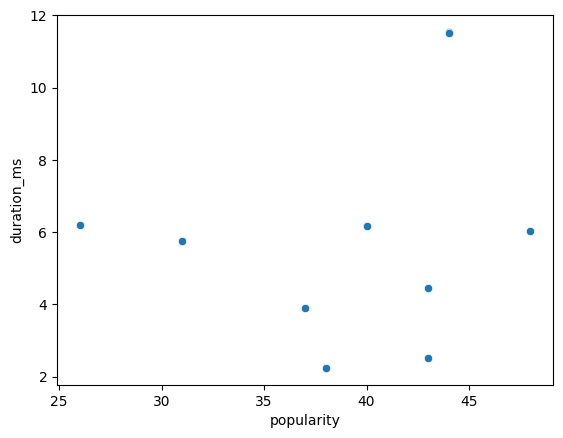

In [7]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")